<a href="https://colab.research.google.com/github/marirepina/Predicted-price/blob/main/Project_programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Получение данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn. model_selection import train_test_split
from sklearn import tree

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/scrap price.csv', delimiter=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df[:10]

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [ ]:
df.shape

(205, 26)

In [ ]:
df.describe()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.groupby('fueltypes')['price'].mean()

fueltypes
diesel    15838.1500
gas       12999.7982
Name: price, dtype: float64

In [ ]:
df.groupby('drivewheels')['price'].mean()

drivewheels
4wd    11087.463000
fwd     9239.308333
rwd    19910.809211
Name: price, dtype: float64

In [ ]:
for i in range(len(df['name'])):
    df['name'][i] = df['name'][i].lower().capitalize().split()[0]

<ipython-input-9-c4a5b39675de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'][i] = df['name'][i].lower().capitalize().split()[0]


[Text(0, 0, 'Alfa-romero'),
 Text(1, 0, 'Audi'),
 Text(2, 0, 'Bmw'),
 Text(3, 0, 'Chevrolet'),
 Text(4, 0, 'Dodge'),
 Text(5, 0, 'Honda'),
 Text(6, 0, 'Isuzu'),
 Text(7, 0, 'Jaguar'),
 Text(8, 0, 'Maxda'),
 Text(9, 0, 'Mazda'),
 Text(10, 0, 'Buick'),
 Text(11, 0, 'Mercury'),
 Text(12, 0, 'Mitsubishi'),
 Text(13, 0, 'Nissan'),
 Text(14, 0, 'Peugeot'),
 Text(15, 0, 'Plymouth'),
 Text(16, 0, 'Porsche'),
 Text(17, 0, 'Porcshce'),
 Text(18, 0, 'Renault'),
 Text(19, 0, 'Saab'),
 Text(20, 0, 'Subaru'),
 Text(21, 0, 'Toyota'),
 Text(22, 0, 'Toyouta'),
 Text(23, 0, 'Vokswagen'),
 Text(24, 0, 'Volkswagen'),
 Text(25, 0, 'Vw'),
 Text(26, 0, 'Volvo')]

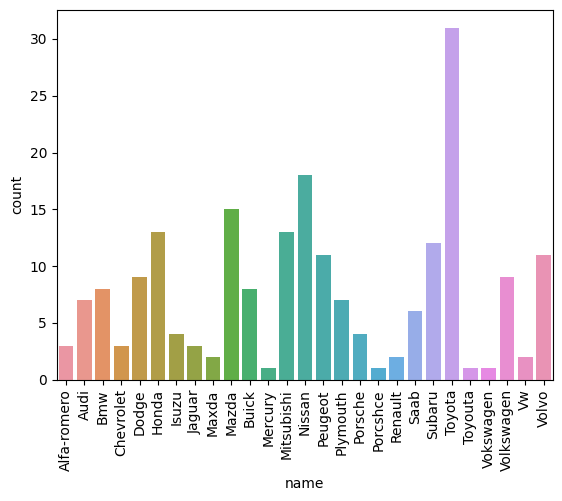

In [ ]:
countplot1 = sns.countplot(data=df, x='name')
countplot1.set_xticklabels(countplot1.get_xticklabels(),rotation = 90)

In [ ]:
df = df[(df['name'] != 'Vw') & (df['name'] != 'Maxda') & (df['name'] != 'Toyouta') & (df['name'] != 'Vokswagen')]

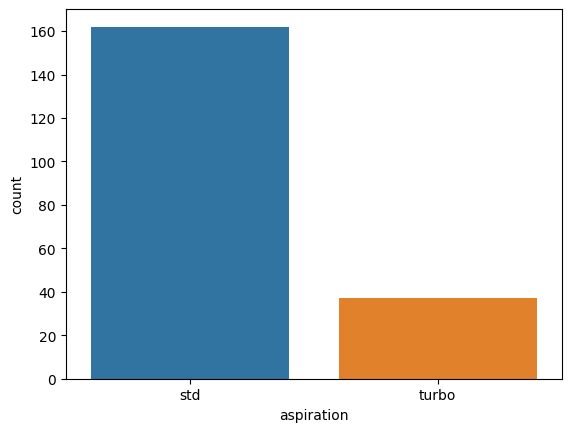

In [ ]:
countplot_1 = sns.countplot(data=df, x="aspiration")

[Text(0, 0, 'Alfa-romero'),
 Text(1, 0, 'Audi'),
 Text(2, 0, 'Bmw'),
 Text(3, 0, 'Chevrolet'),
 Text(4, 0, 'Dodge'),
 Text(5, 0, 'Honda'),
 Text(6, 0, 'Isuzu'),
 Text(7, 0, 'Jaguar'),
 Text(8, 0, 'Mazda'),
 Text(9, 0, 'Buick'),
 Text(10, 0, 'Mercury'),
 Text(11, 0, 'Mitsubishi'),
 Text(12, 0, 'Nissan'),
 Text(13, 0, 'Peugeot'),
 Text(14, 0, 'Plymouth'),
 Text(15, 0, 'Porsche'),
 Text(16, 0, 'Porcshce'),
 Text(17, 0, 'Renault'),
 Text(18, 0, 'Saab'),
 Text(19, 0, 'Subaru'),
 Text(20, 0, 'Toyota'),
 Text(21, 0, 'Volkswagen'),
 Text(22, 0, 'Volvo')]

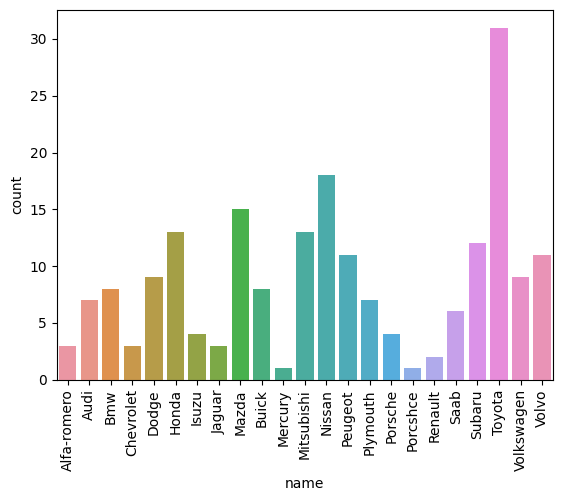

In [ ]:
countplot1 = sns.countplot(data=df, x='name')
countplot1.set_xticklabels(countplot1.get_xticklabels(),rotation = 90)

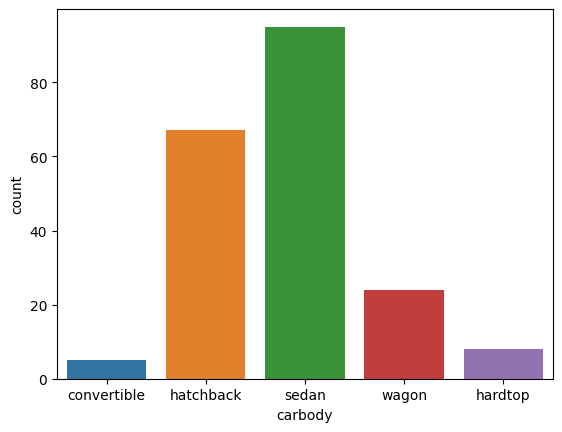

In [ ]:
countplot_2 = sns.countplot(data=df, x="carbody")

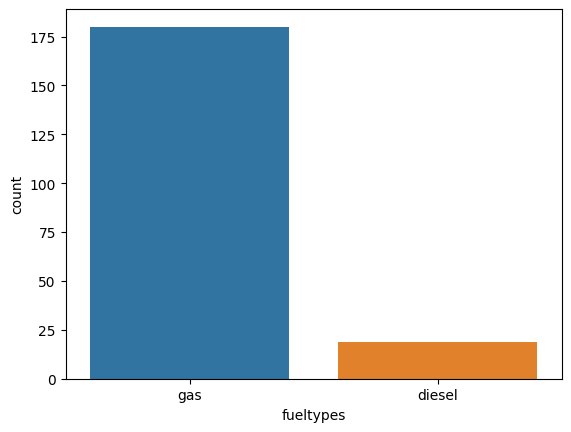

In [ ]:
countplot_3 = sns.countplot(data=df, x="fueltypes")

<Axes: xlabel='horsepower', ylabel='price'>

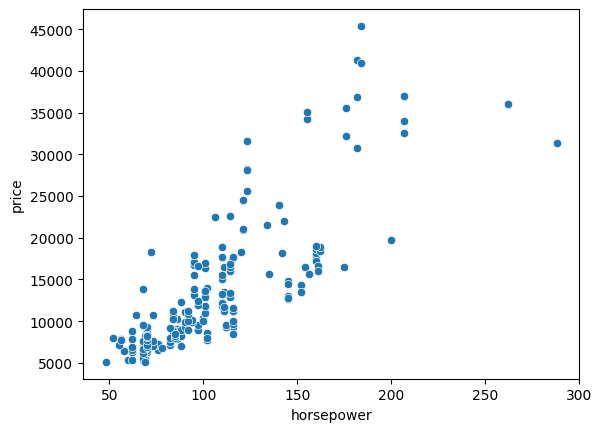

In [ ]:
sns.scatterplot(data=df, x='horsepower', y='price')

**На картинке видно прямую зависимость цены от лошадиных сил.**

<ipython-input-17-41fefbf9abb1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


<Axes: >

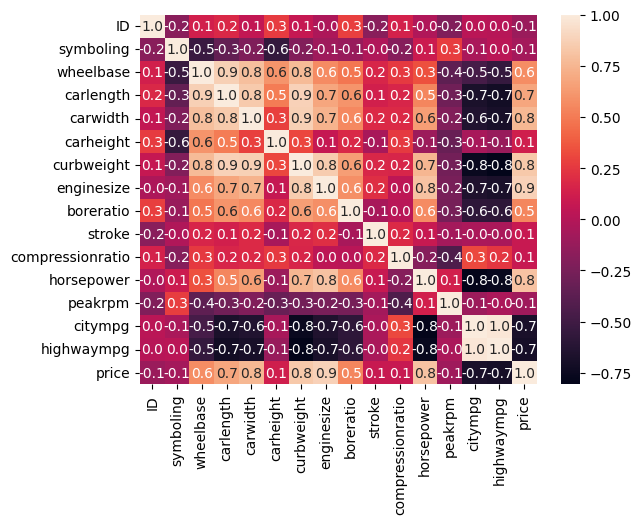

In [ ]:
cor = df.corr()
sns.heatmap(cor, annot=True, fmt=".1f")

<Axes: xlabel='enginesize', ylabel='price'>

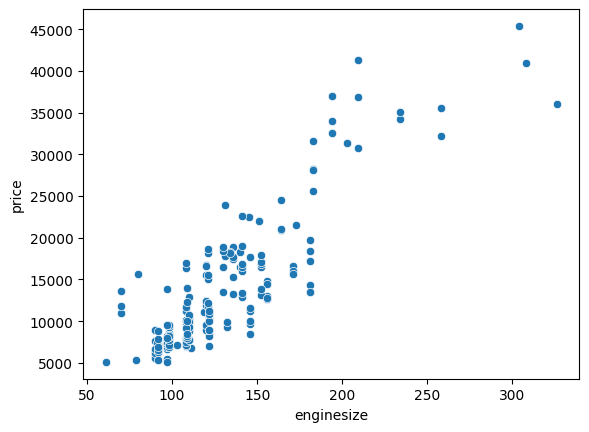

In [ ]:
sns.scatterplot(data=df, x='enginesize', y='price')

Исходя из приведенного анализа, становится понятно, что наибольшее влияние на цену оказывает объем двигателя и число лошадинных сил.

# Линейная регрессия

In [ ]:
df_cut = df[['price', 'horsepower']]

In [ ]:
train, test = train_test_split(df_cut, test_size= 0.2 , random_state= 0)

In [ ]:
linearRegression = LinearRegression()
results = linearRegression.fit(train['horsepower'].values.reshape(-1, 1), y=train['price'].values)

In [ ]:
results.coef_, results.intercept_

(array([165.36657372]), -3773.783930704916)

In [ ]:
test['Pedicted price'] = results.predict(test['horsepower'].values.reshape(-1, 1))

In [ ]:
test.head()

,price,horsepower,Pedicted price
18,5151.0,48,4163.811608
171,11549.0,116,15408.738620
108,13200.0,95,11936.040572
94,7299.0,69,7636.509656
178,16558.0,161,22850.234438


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(test['price'], test['Pedicted price'])

3047.9090380919306

Средняя ошибка вышла достаточно большой. Стоит попробовать использовать другой метод для предсказания. На это может влиять название бренда и другие характеристики, с которыми коррелирует цена.
Гипотеза: угадать цену можно за небольшое количество вопросов. И модель эти вопросы найдет автоматически.

# Дерево решений

In [ ]:
df_cut_1 = df[['price', 'horsepower', 'enginesize']]

In [ ]:
train1, test1 = train_test_split(df_cut_1, test_size= 0.2 , random_state= 0)

In [ ]:
model=tree.DecisionTreeRegressor(max_depth=5)
model.fit(train1[['horsepower', 'enginesize']].values.reshape(-1, 2), y=train1['price'].values)

DecisionTreeRegressor(max_depth=5)

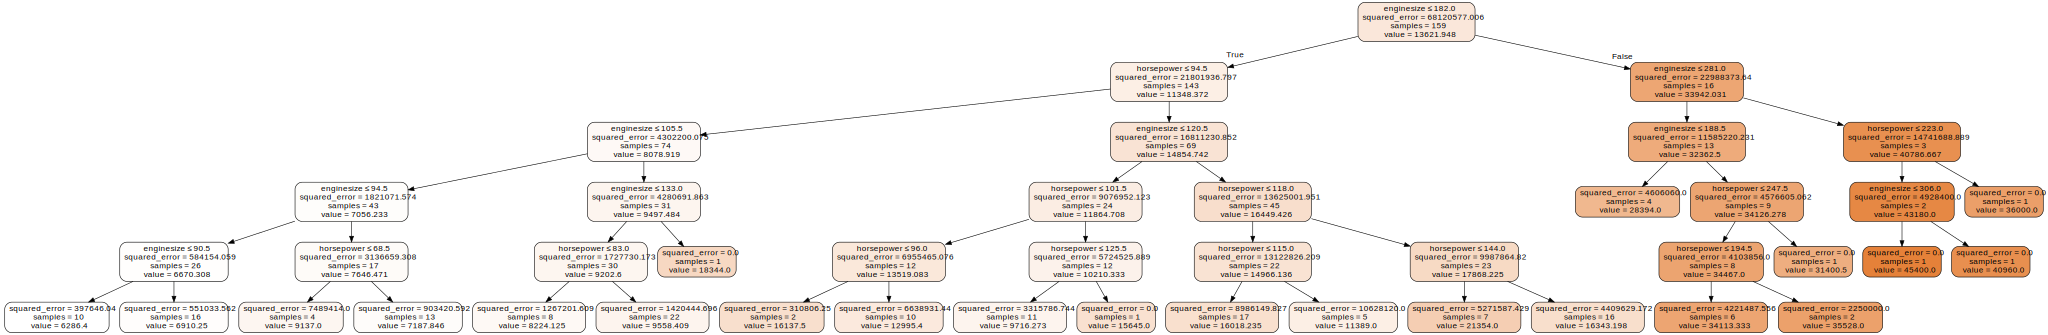

In [ ]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=['horsepower', 'enginesize'],
                                class_names='price',
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
test1['Predicted']=model.predict(test1[['horsepower', 'enginesize']].values.reshape(-1, 2))

In [ ]:
test1.head()

,price,horsepower,enginesize,Predicted
18,5151.0,48,61,6286.400000
171,11549.0,116,146,11389.000000
108,13200.0,95,152,16018.235294
94,7299.0,69,97,7187.846154
178,16558.0,161,171,16343.197938


In [ ]:
mean_absolute_error(test1['price'], test1['Predicted'])

1692.2623921911422

Точность предсказания дерева решений выше, чем при применении метода линейной регрессии.